#### Business understanding
--------------------------------

### Data understanding
    
This dataset contains the locations of customers. The dataset has the following columns:  
   - ***clientid*** : The unique identifier for the customer
   - ***x*** : The x coordinate of the customer's location, when plotted into a 2D plane
   - ***y*** : The y coordinate of the customer's location, when plotted into a 2D plane

The dataset has 5936 rows of data and has no missing values or outliers.

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read dataframe from local file
df = pd.read_csv('data/drone_cust_locations.csv', sep=';')
df 

,clientid,x,y
0,1,622.771572,164.857623
1,2,416.357298,630.193634
2,3,292.735020,567.333231
3,4,737.211288,166.225676
4,5,540.475375,682.912298
...,...,...,...
5951,5952,832.857394,616.861410
5952,5953,242.734500,490.325092
5953,5954,108.690847,758.833921
5954,5955,803.251074,430.740623


### Data preparation
Since id is not a useful feature for clustering, we will drop it. a 

In [185]:
df.drop('clientid', axis=1, inplace=True)
df

,x,y
0,622.771572,164.857623
1,416.357298,630.193634
2,292.735020,567.333231
3,737.211288,166.225676
4,540.475375,682.912298
...,...,...
5951,832.857394,616.861410
5952,242.734500,490.325092
5953,108.690847,758.833921
5954,803.251074,430.740623


we plot the data so we can see visually how the customers are located in the 2D plane.
we can see from the data that it contains somekind of unoccupied zone in the middle.
also the customers are not evenly distributed in the plane. specifically the customers are more concentrated in the bottom rightcorner of the plane. This uneven distribution may impact clustering performance.

<Axes: xlabel='x', ylabel='y'>

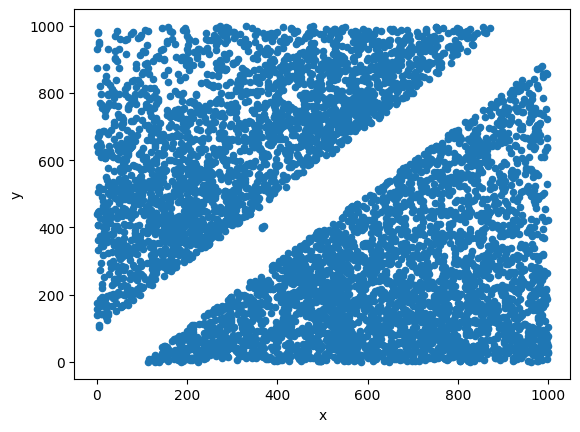

In [186]:
df.plot.scatter(x='x', y='y')

## Modelling
First, we used the ***WCSS (Within-Cluster Sum of Squares)*** method to determine the optimal number of clusters. Based on the elbow method, the most suitable choice appeared to be ***3 clusters***. To further evaluate the quality, we calculated the silhouette score, which resulted in 0.45, indicating moderate clustering accuracy with some overlap between clusters.

##### calculate WCSS

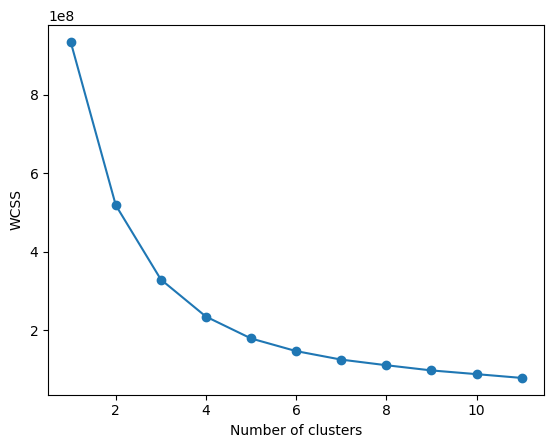

In [187]:
import matplotlib.pyplot as plt

wcss = []
for i in range(1,12):
    model = KMeans(init='random', n_clusters=i, random_state=42).fit(df)
    wcss.append(model.inertia_)
    
plt.plot(range(1,12), wcss, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### calculate silhouette score

In [188]:
from sklearn.metrics import silhouette_score
numnber_of_depots = 3
model = KMeans(init='random', n_clusters=numnber_of_depots, random_state=42).fit(df)
labels = model.labels_
print('Silhouette score = %.2f' % silhouette_score(df, labels))

Silhouette score = 0.42


Attach the information on the closest depot to each client in the dataframe.

In [189]:
labels = model.fit_predict(df)
df["Depot"] = labels
df.head(10)

,x,y,Depot
0,622.771572,164.857623,0
1,416.357298,630.193634,2
2,292.735020,567.333231,1
3,737.211288,166.225676,0
4,540.475375,682.912298,2
5,535.469492,318.439661,0
6,640.380050,870.833221,2
7,235.772075,359.048203,1
8,481.896884,661.491838,2
9,730.032789,312.177817,0


### Evaluation

<Axes: xlabel='x', ylabel='y'>

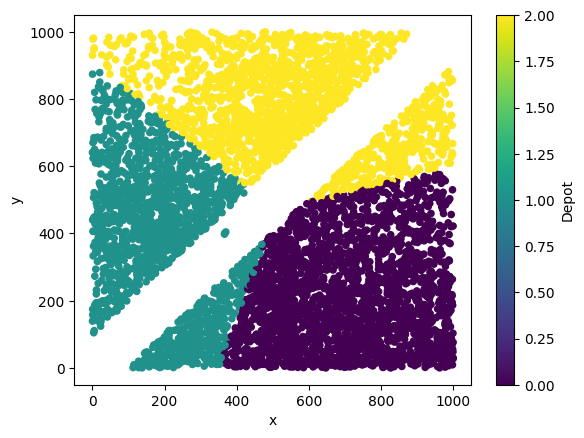

In [190]:
df.plot.scatter(x='x', y='y', c='Depot', cmap='viridis')

In [191]:
df["Depot"].value_counts()

Depot
0    2488
1    1762
2    1706
Name: count, dtype: int64

In [192]:
model.cluster_centers_

array([[702.08109226, 211.2703835 ],
       [198.44098904, 383.25861847],
       [548.20586479, 787.2788963 ]])